## 회귀 (regression) 예측

수치형 값을 예측 (Y의 값이 연속된 수치로 표현)

**예시**
- 주택 가격 예측
- 매출액 예측

[도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [11]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)
#suppress=False 는 숫자가 너무 크거나 작으면 과학적 표기법을 사용하지만, suppress=True는 과학적 표기법을 사용하지 않고, 일반적인 실수 형태로 보여줌

scikit-learn version 1.2. 이후부터는 load_boston이 삭제되어서 다음과 같이 데이터셋을 불러옴

from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=1, as_frame=True)

In [12]:
from sklearn.datasets import fetch_openml

data = fetch_openml(name="boston", version=1, as_frame=True)
# fetch_openml: OpenML에서 데이터셋을 가져옴
# name="boston": 데이터셋 이름
# version=1: 데이터셋 버전
# as_frame=True: data 형태가 데이터프레임으로 변환됨
# boston은 sklearn.utils.Bunch 객체
# Python의 딕셔너리와 유사한 구조, 속성에 점(.)으로 접근 가능
print(data.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


데이터 로드

In [13]:
print(data['DESCR'])

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

data['data']에는 X 데이터, data['feature_names']에는 컬럼 명입니다.

In [14]:
#data와 컬럼(이름표)를 붙이고 아래 정답지를 따로 주문해서 df를 수동으로 만듦
df = pd.DataFrame(data['data'], columns=data['feature_names'])

Y 데이터인 price도 데이터프레임에 추가 합니다.

In [15]:
df['MEDV'] = data['target']

In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**컬럼 소개**

속성 수 : 13

* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

In [17]:
# 참고
# 위와 같이 직접 데이터프레임 생성 가능
# 또한 data.frame에 입력 데이터(data)와 타겟(target)이 합쳐진 데이터프레임이 이미 존재하므로 해당 데이터프레임을 바로 선언 가능
df2 = data.frame
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [82]:
#df와 df2가 동일한지 확인 
print(df.equals(df2))

True


train / test 데이터를 분할 합니다.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', axis=1), df['MEDV'])

In [21]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [22]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
425,15.86030,0.0,18.10,0,0.679,5.896,95.4,1.9096,24,666.0,20.2,7.68,24.39
405,67.92080,0.0,18.10,0,0.693,5.683,100.0,1.4254,24,666.0,20.2,384.97,22.98
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33
80,0.04113,25.0,4.86,0,0.426,6.727,33.5,5.4007,4,281.0,19.0,396.90,5.29
339,0.05497,0.0,5.19,0,0.515,5.985,45.4,4.8122,5,224.0,20.2,396.90,9.74


In [23]:
y_train.head()

425     8.3
405     5.0
500    16.8
80     28.0
339    19.0
Name: MEDV, dtype: float64

## 평가 지표 만들기

### MSE(Mean Squared Error)

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 값

### MAE (Mean Absolute Error)

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값

### RMSE (Root Mean Squared Error)

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 뒤 **루트**를 씌운 값

### 평가 지표 만들어 보기

In [24]:
import numpy as np

In [ ]:
pred = np.array([3, 4, 5]) #예측값
actual = np.array([1, 2, 3]) #실제값
#모든 문제에서 2만큼씩 더 크게 예측 

In [ ]:
#MSE (Mean Squared Error): 평균 제곱 오차
#틀린게 있으면 가차 없이 제곱해서 오차가 조금만 커져도 점수가 나빠짐
def my_mse(pred, actual):
    return ((pred - actual)**2).mean()

In [27]:
my_mse(pred, actual)

np.float64(4.0)

In [ ]:
#MAE(Mean Absolute Error): 평균 절대 오차
#딱 틀리니 만큼판 평균 내자 
def my_mae(pred, actual):
    return np.abs(pred - actual).mean()

In [29]:
my_mae(pred, actual)

np.float64(2.0)

In [ ]:
    #RMSE(Root Mean Square Error): 평균 제곱근 오차 
#MSE에서 제곱했던 거 다시 원상복구 시키자
def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))

In [31]:
my_rmse(pred, actual)

np.float64(2.0)

### sklearn의 평가지표 활용하기

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# 직접 만든 함수와 sklearn 함수로 MAE 구한 것을 비교
my_mae(pred, actual), mean_absolute_error(pred, actual)

(np.float64(2.0), 2.0)

In [34]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(np.float64(4.0), 4.0)

### 모델별 성능 확인을 위한 함수

In [ ]:
# 예측vs정답 그래프 + 여러 모델 점수 누적 저장 + 지금까지 모델들의 정렬된 표 + 한눈에 비교 작업을 같은 작업 모델마다 반복해야해서

import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {} #모델들의 성적표를 모아둘 빈 딕셔너리 노트

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    #모델이 예측한 값(pred)과 실제 정답(actual)을 비교하여 예측 vs 정답 점그래프를 출력
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    #표를 만들 때 딕셔너리 형태 {key=열이름,  value=열의 데이터} 로 받는 것이 열 추가, 삭제가
    df = df.sort_values(by='actual').reset_index(drop=True)
    #sort_values(by='actual'): 실제 정답이 낮은 순서부터 높은 순서대로 데이터를 정렬 
    #reset_index(drop=True): 인덱스를 다시 정렬
    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    #x축: df.index (0,1,2,3… 줄 세운 순서)
    #y축은 예측 가격으로 빨간색 x모양으로 표시
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    #y축은 실제 정답 가격으로 검은색 o모양으로 표시
    #alpha: 투명도
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual) #예측 vs 정답 점그래프 출력

    mse = mean_squared_error(pred, actual) # MSE 계산
    my_predictions[name_] = mse #MSE 저장
    #딕셔너리에서 key로 해서 그 모델의 점수 mse를 value로 불러와 my_predictions에 저장
    #이 줄로 누적비교가 가능해짐

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    #sorted(key)는 정렬할 때, 각 항목에서 무엇을 기준값으로 삼을지 알려주는 함수
    #.items(): 딕셔너리의 키와 값의 쌍을 반환
    # key=lambda x: x[1]: x를 받으면, 그 안에서 두 번째 값인 mse를 기준으로 정렬
    #(모델이름, 점수)묶음을 가져와서, 각 묶음의 두 번째 값을 꺼내고, 그 점수를 기준으로, 큰 점수부터 정렬
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df) 
    #MSE 정렬 결과를 표로 출력
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10

    length = len(df)

    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])

    #정렬 결과를 막대그래프로 출력
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors)) #랜덤 색 하나 뽑기
        bars[i].set_color(colors[idx]) #i번째 막대 색칠하기
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold') 
        #막대 옆에 숫자 써주기
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()
#성적표에서 그 모델 기록만 삭제 
def remove_model(name_):
    global my_predictions #함수 밖에 있는 my_predictions를 사용할 수 있도록 전역변수로 선언
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

## LinearRegression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression(n_jobs=-1)

In [ ]:
#선형회귀는 기본적으로 숫자 입력이 필요함
# 데이터의 CHAS와 RAD가 category 타입이라서 그대로 predict를 하면 TypeError가 발생
# 마찬가지로 train 데이터도 타입을 변경해서 fit을 해주는게 일관성 유지에 도움
x_test.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object

* n_jobs: CPU코어의 사용

In [ ]:
# astype으로 타입 변경
#학습할 때와 테스트 때의 데이터 형태를 동일하게 맞춰줌
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [40]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [41]:
pred = model.predict(x_test)

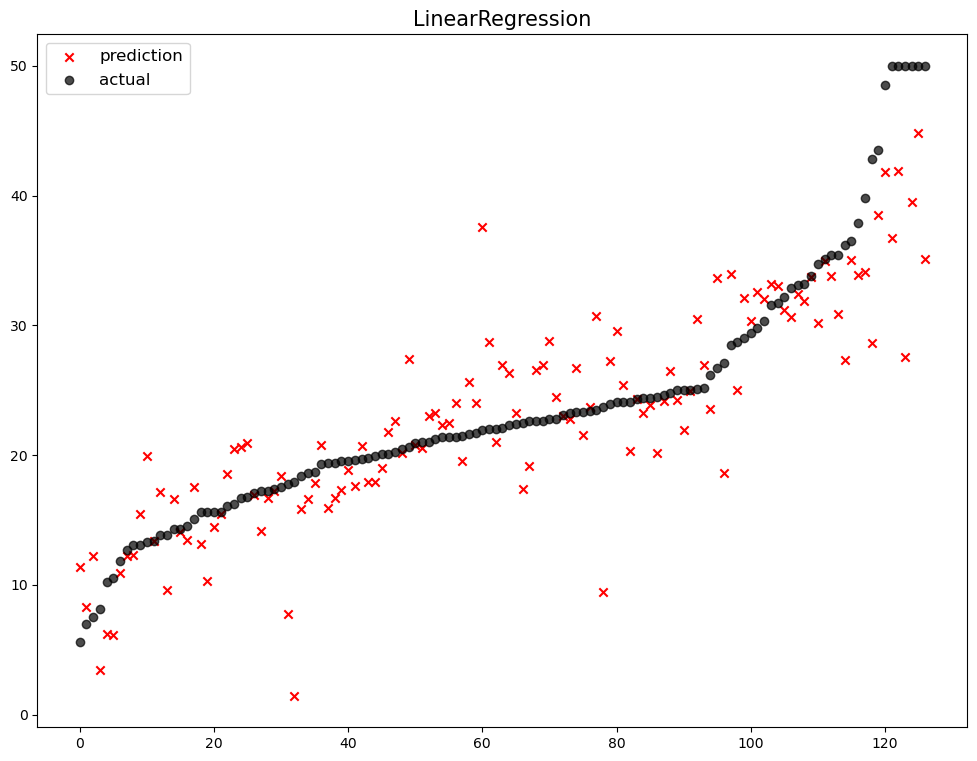

              model        mse
0  LinearRegression  26.884421


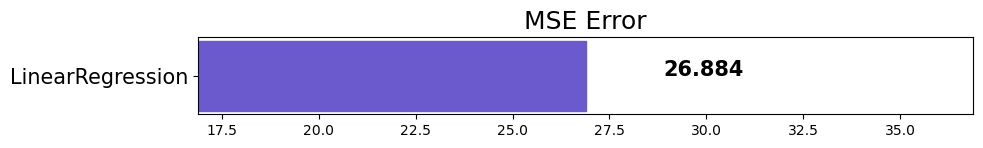

In [42]:
mse_eval('LinearRegression', pred, y_test)

## 규제 (Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것

**L2 규제 (L2 Regularization)**

* 각 가중치 제곱의 합에 규제 강도(Regularization Strength) λ를 곱한다.
* λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).

**L1 규제 (L1 Regularization)**

* 가중치의 제곱의 합이 아닌 **가중치의 합**을 더한 값에 규제 강도(Regularization Strength) λ를 곱하여 오차에 더한다.
* 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다.


**L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다**

**릿지(Ridge) - L2 규제**

$Error=MSE+αw^2$

**라쏘(Lasso) - L1 규제**  
라쏘는 변수 단위에 민감해서 스케일링 후에 쓰는게 일반적
모든 변수를 다 써서 답을 맞추려고 하는 선형회귀와 다르게 별로 중요하지 않은 변수는 영향력을 0으로 만들고 중요한 변수만 남기려고 함
$Error=MSE+α|w|$

In [43]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [ ]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    #barh(막대 개수, 막대 길이)
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

In [45]:
from sklearn.linear_model import Lasso

In [46]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

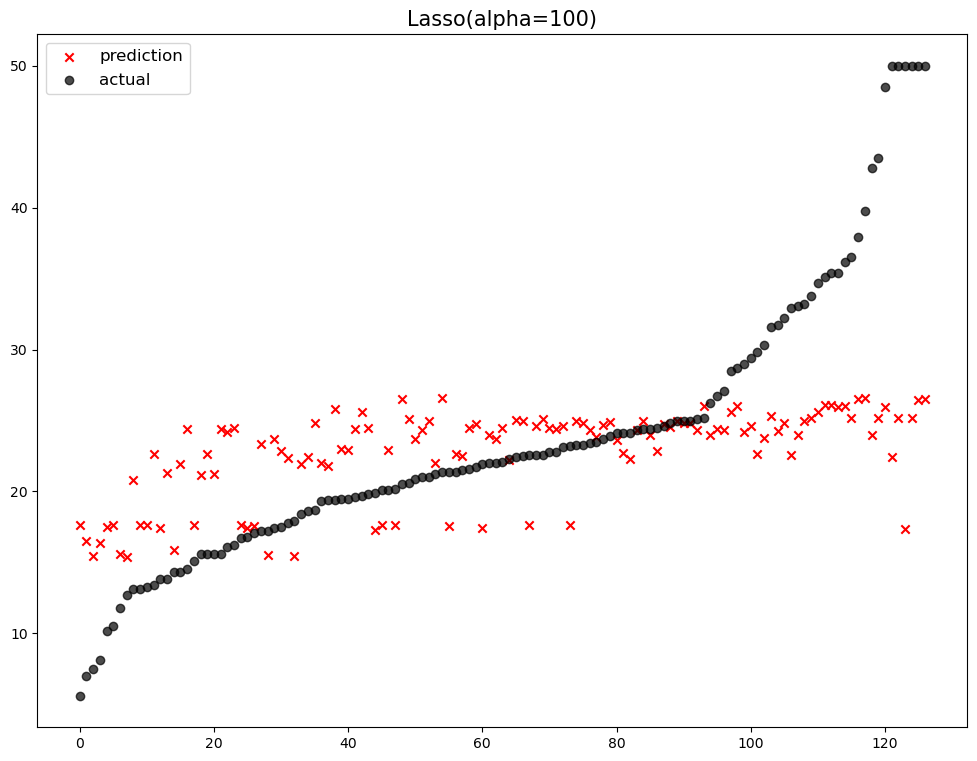

              model        mse
0  Lasso(alpha=100)  69.319960
1  LinearRegression  26.884421


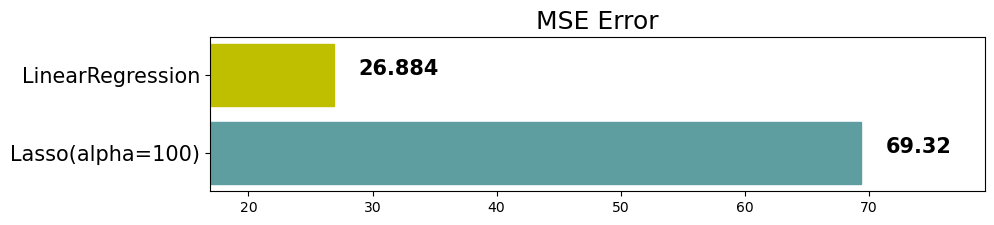

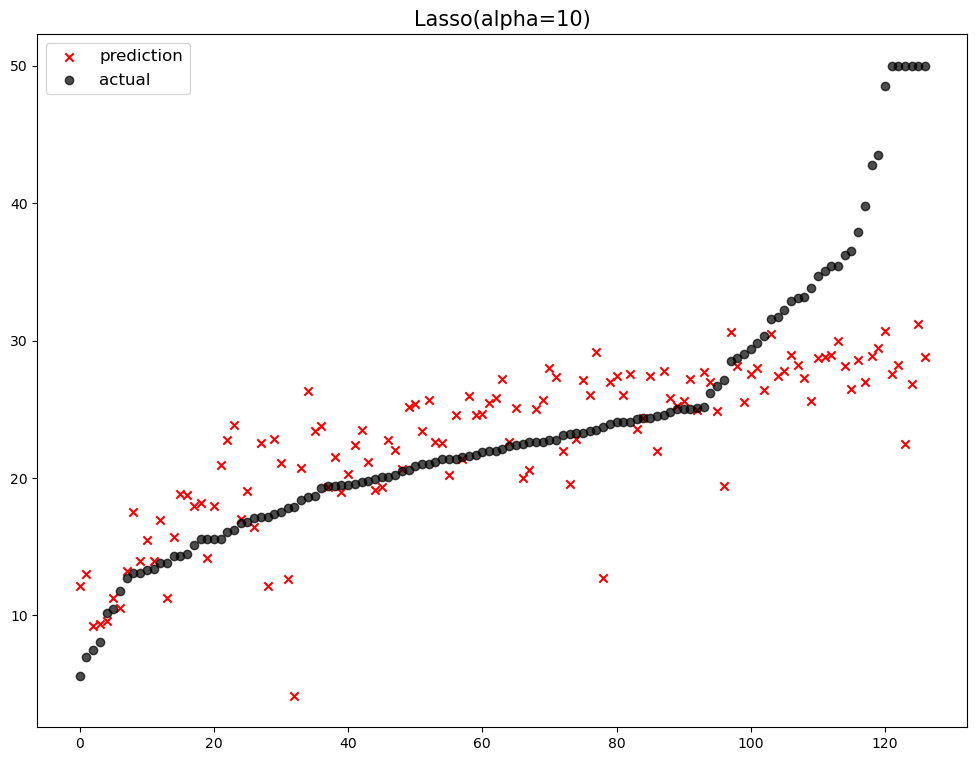

              model        mse
0  Lasso(alpha=100)  69.319960
1   Lasso(alpha=10)  46.706710
2  LinearRegression  26.884421


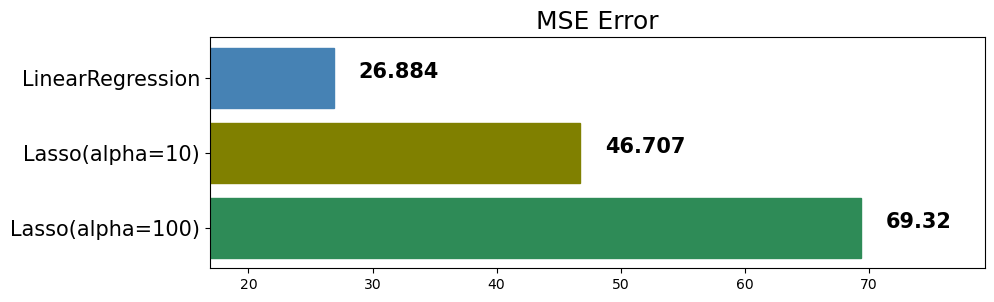

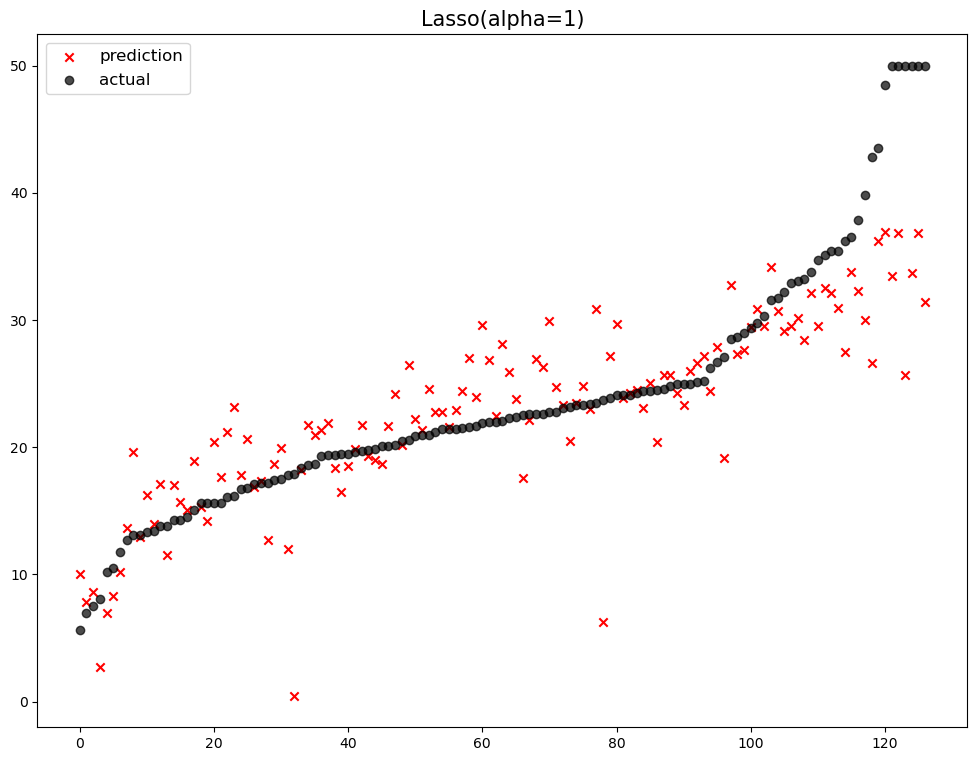

              model        mse
0  Lasso(alpha=100)  69.319960
1   Lasso(alpha=10)  46.706710
2    Lasso(alpha=1)  33.038574
3  LinearRegression  26.884421


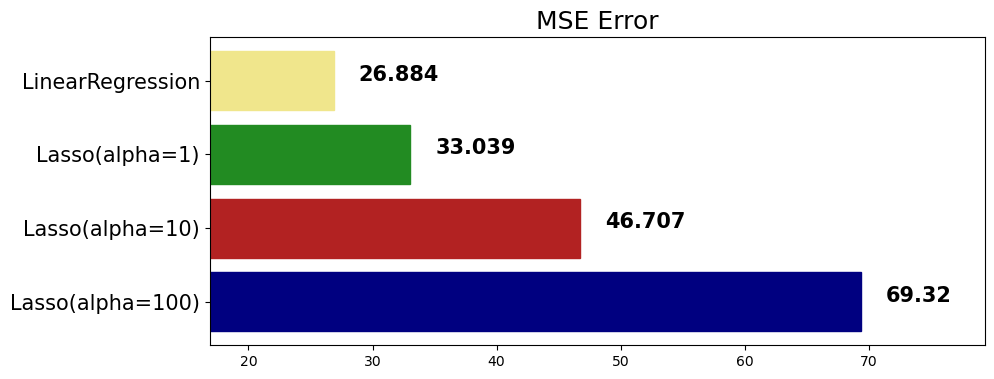

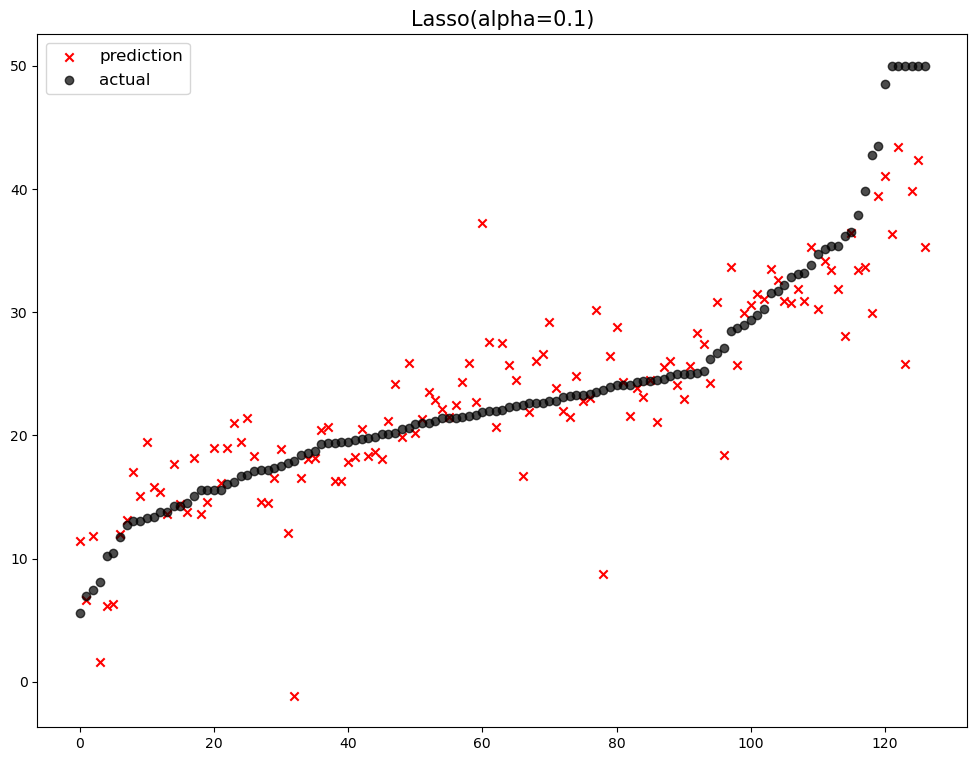

              model        mse
0  Lasso(alpha=100)  69.319960
1   Lasso(alpha=10)  46.706710
2    Lasso(alpha=1)  33.038574
3  LinearRegression  26.884421
4  Lasso(alpha=0.1)  26.320899


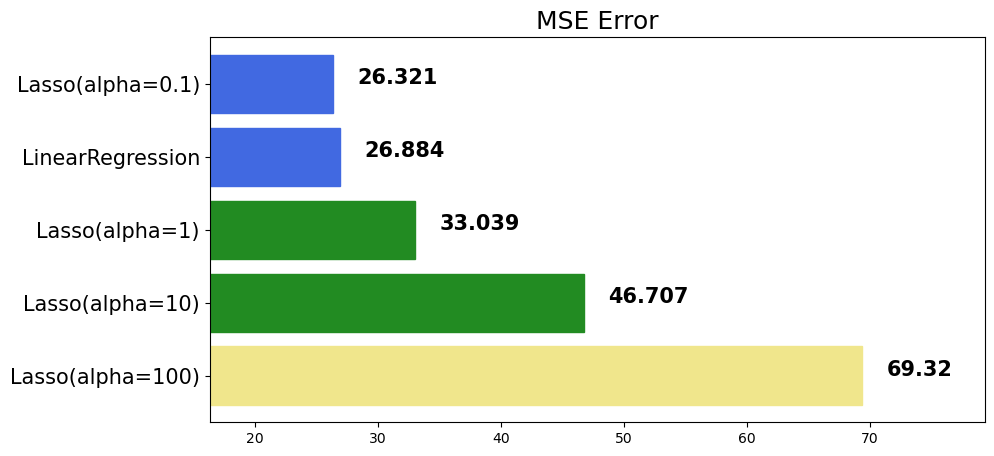

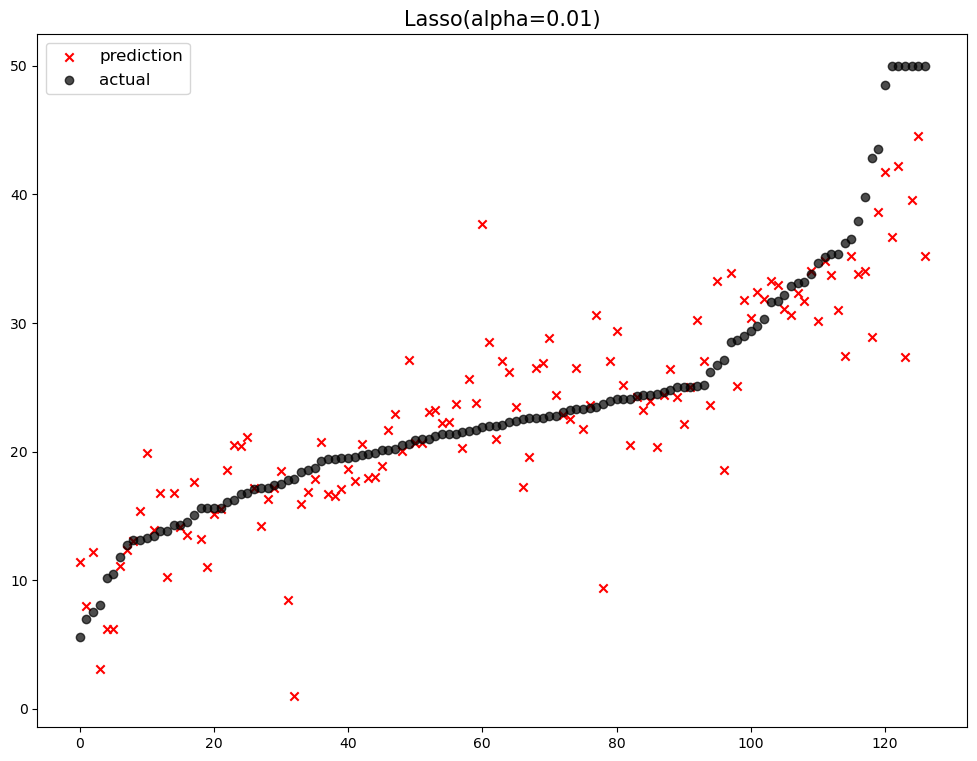

               model        mse
0   Lasso(alpha=100)  69.319960
1    Lasso(alpha=10)  46.706710
2     Lasso(alpha=1)  33.038574
3   LinearRegression  26.884421
4  Lasso(alpha=0.01)  26.495793
5   Lasso(alpha=0.1)  26.320899


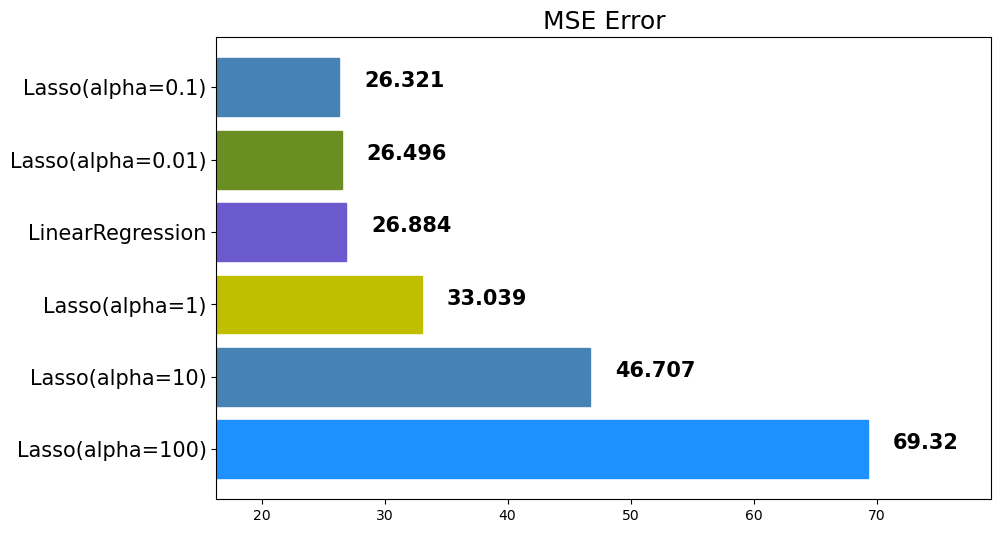

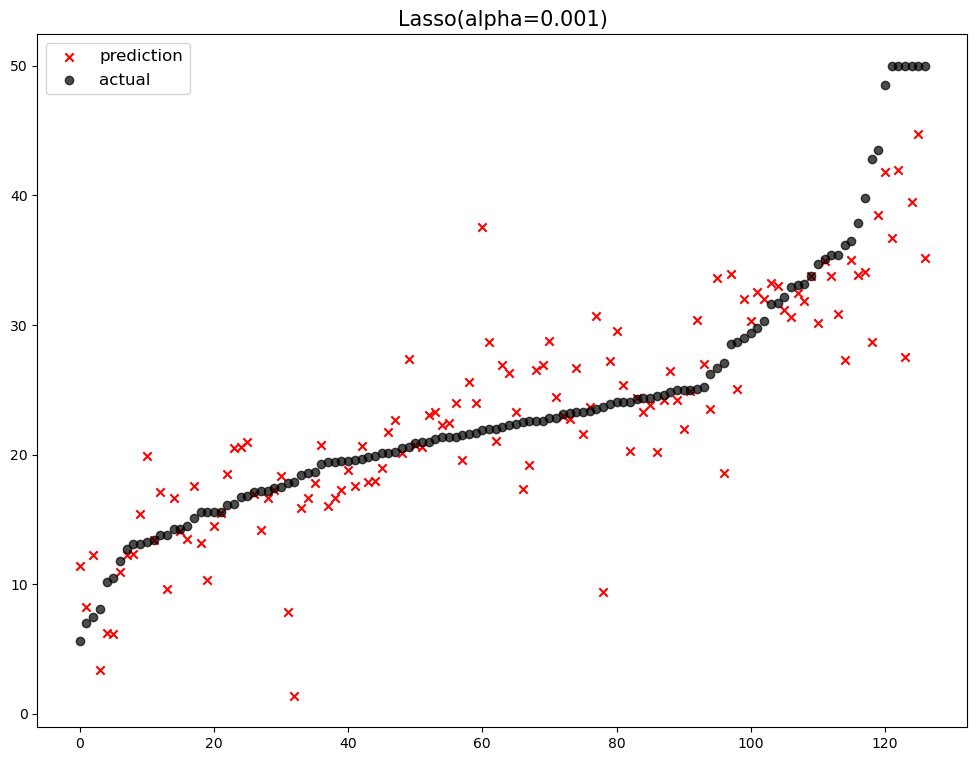

                model        mse
0    Lasso(alpha=100)  69.319960
1     Lasso(alpha=10)  46.706710
2      Lasso(alpha=1)  33.038574
3    LinearRegression  26.884421
4  Lasso(alpha=0.001)  26.840394
5   Lasso(alpha=0.01)  26.495793
6    Lasso(alpha=0.1)  26.320899


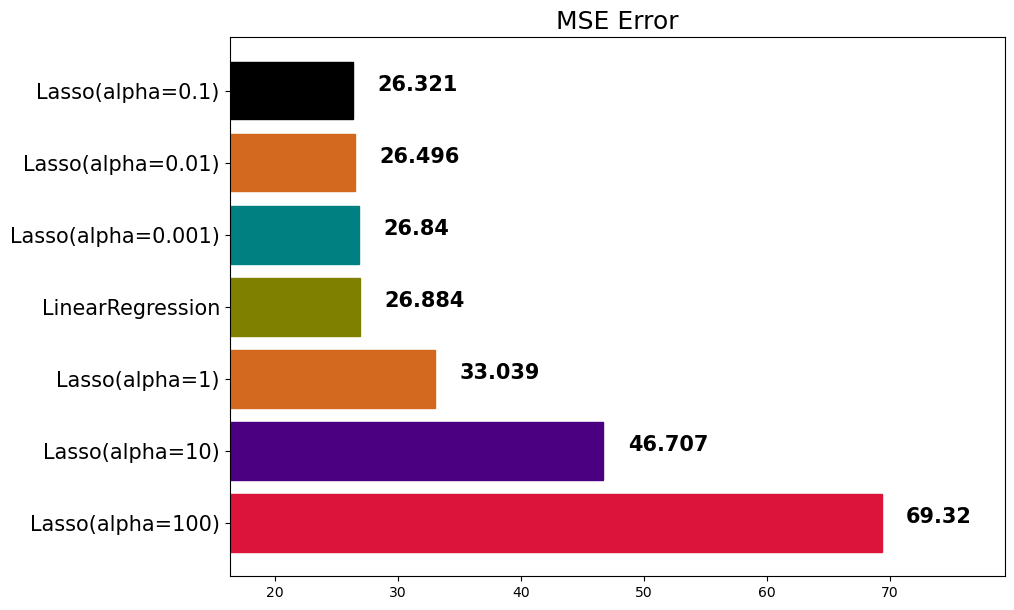

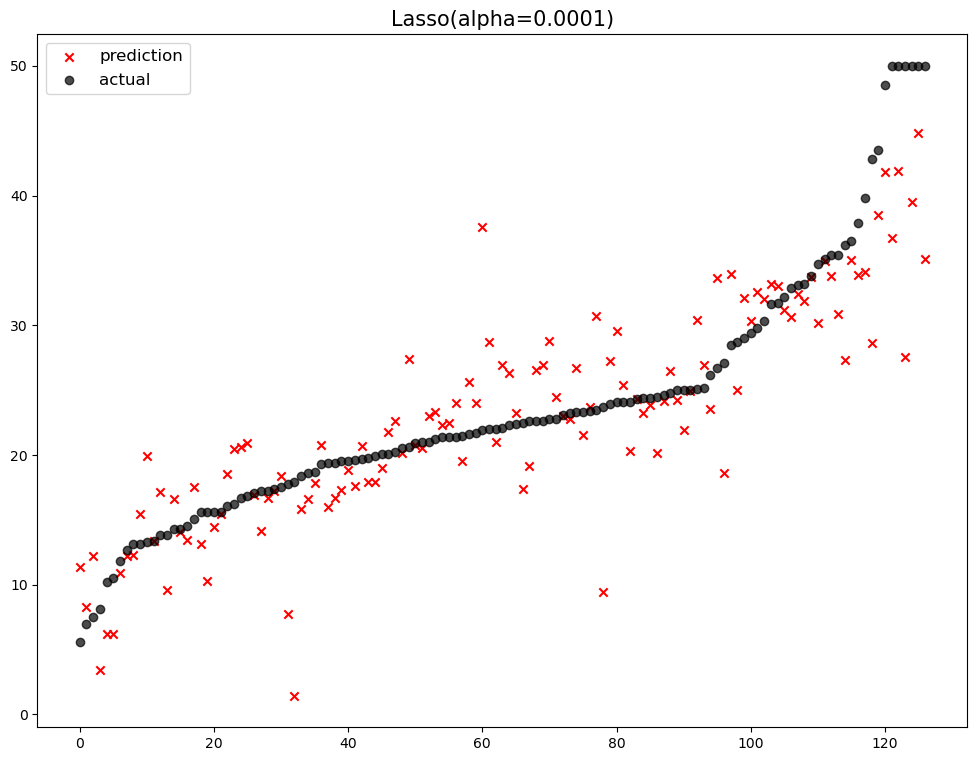

                 model        mse
0     Lasso(alpha=100)  69.319960
1      Lasso(alpha=10)  46.706710
2       Lasso(alpha=1)  33.038574
3     LinearRegression  26.884421
4  Lasso(alpha=0.0001)  26.879966
5   Lasso(alpha=0.001)  26.840394
6    Lasso(alpha=0.01)  26.495793
7     Lasso(alpha=0.1)  26.320899


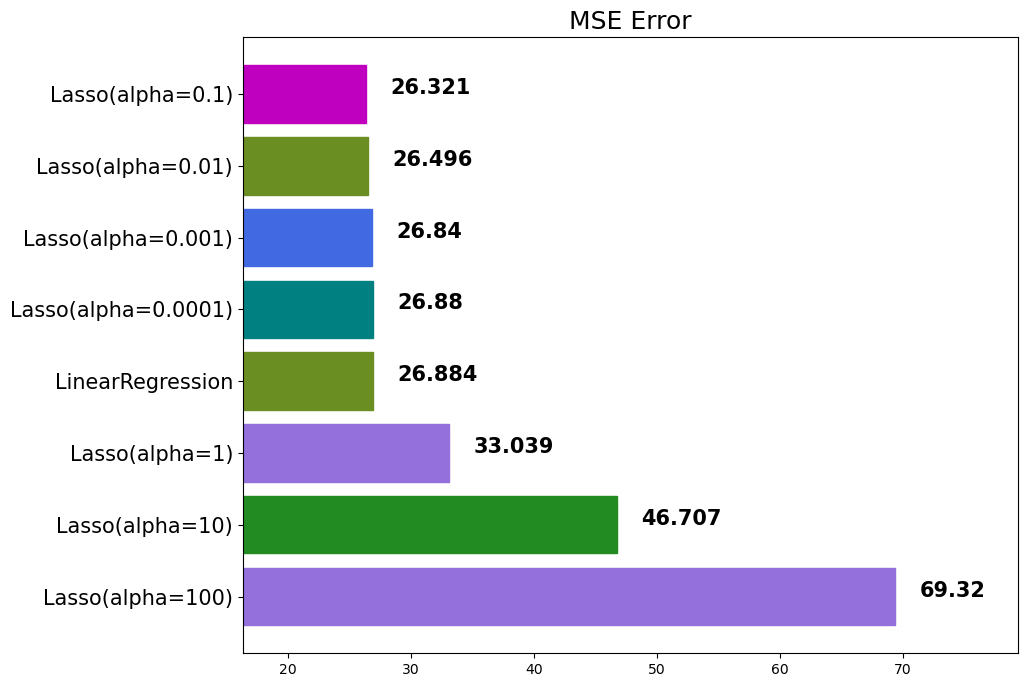

In [47]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [48]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

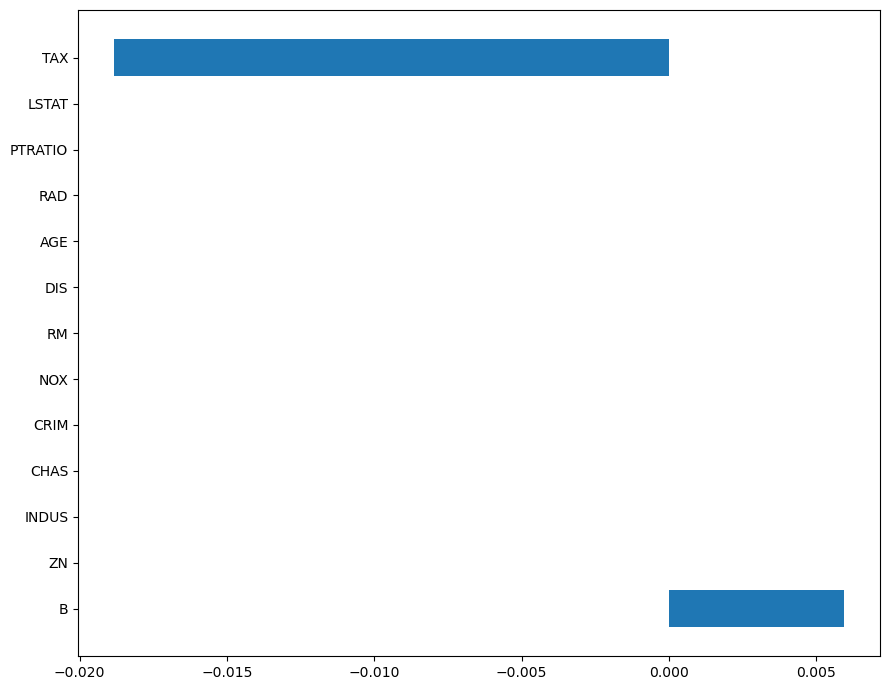

In [49]:
plot_coef(x_train.columns, lasso_100.coef_)

In [50]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.01881877,
       -0.        ,  0.00591821, -0.        ])

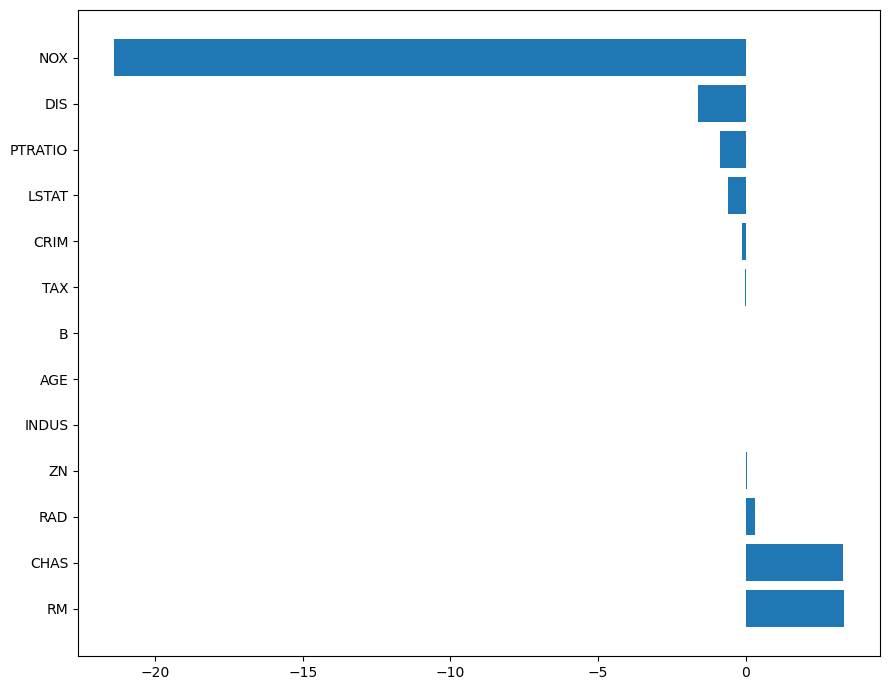

In [51]:
plot_coef(x_train.columns, lasso_001.coef_)

In [52]:
lasso_001.coef_

array([ -0.11270048,   0.05547195,   0.02880097,   3.29335899,
       -21.38902047,   3.3200982 ,   0.01030213,  -1.59972546,
         0.32661738,  -0.01135318,  -0.87981761,   0.01014159,
        -0.59862914])

### ElasticNet

**l1_ratio (default=0.5)**

 * l1_ratio = 0 (L2 규제만 사용).
 * l1_ratio = 1 (L1 규제만 사용).
 * 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)

In [53]:
from sklearn.linear_model import ElasticNet

In [54]:
ratios = [0.2, 0.5, 0.8]

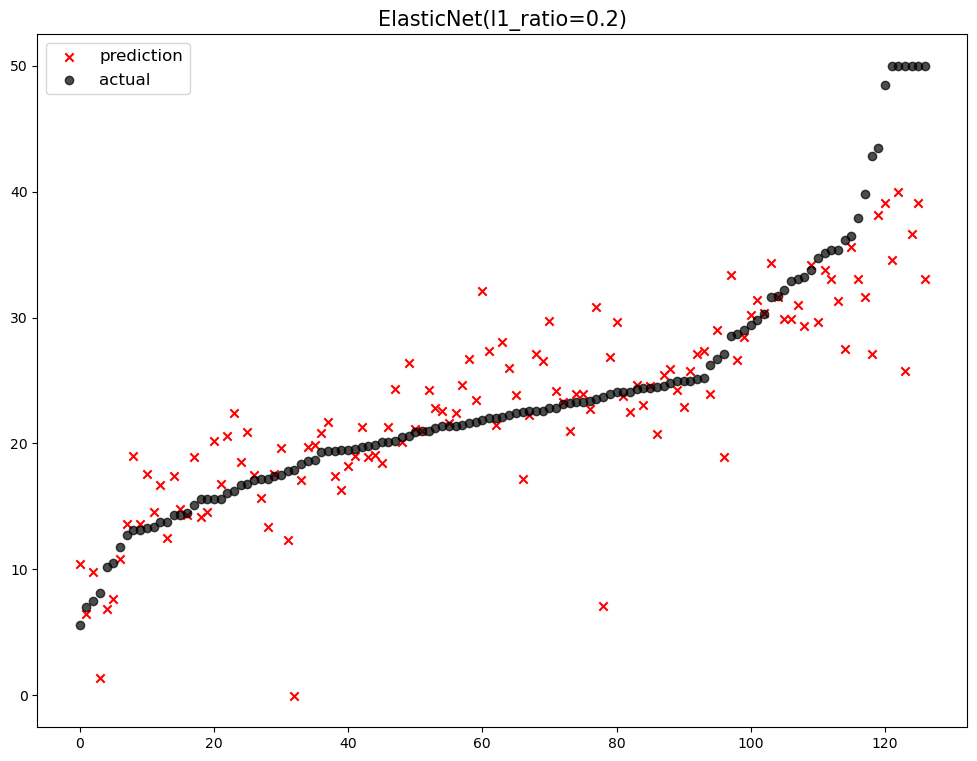

                      model        mse
0          Lasso(alpha=100)  69.319960
1           Lasso(alpha=10)  46.706710
2            Lasso(alpha=1)  33.038574
3  ElasticNet(l1_ratio=0.2)  29.538025
4          LinearRegression  26.884421
5       Lasso(alpha=0.0001)  26.879966
6        Lasso(alpha=0.001)  26.840394
7         Lasso(alpha=0.01)  26.495793
8          Lasso(alpha=0.1)  26.320899


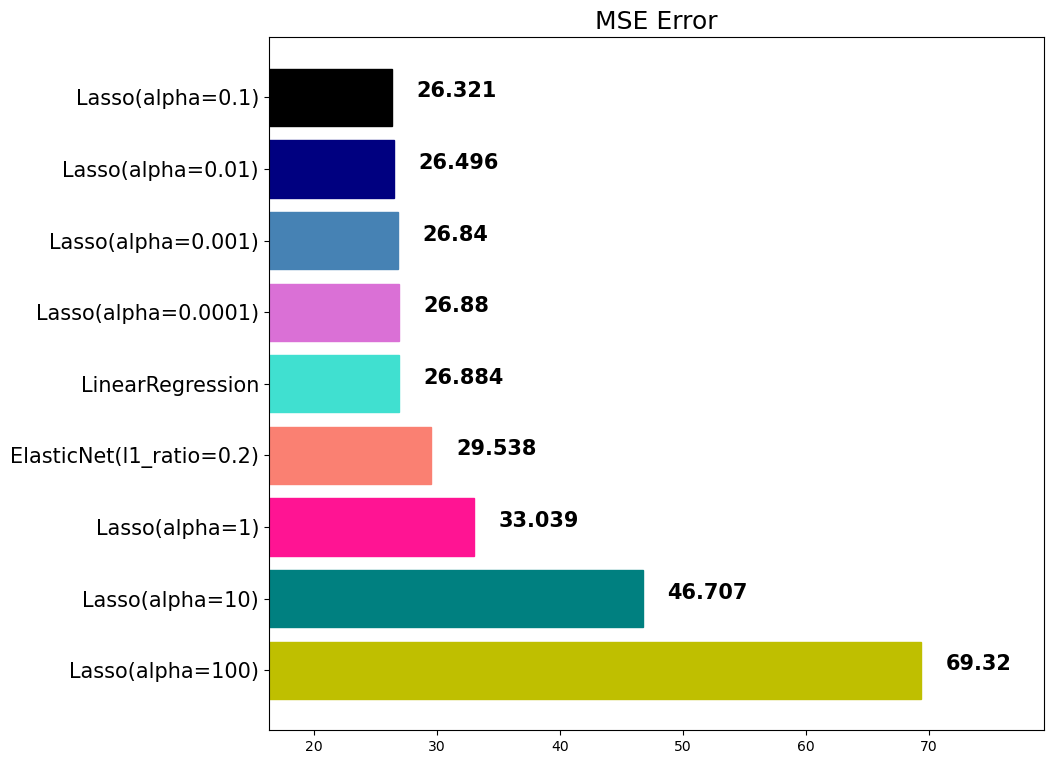

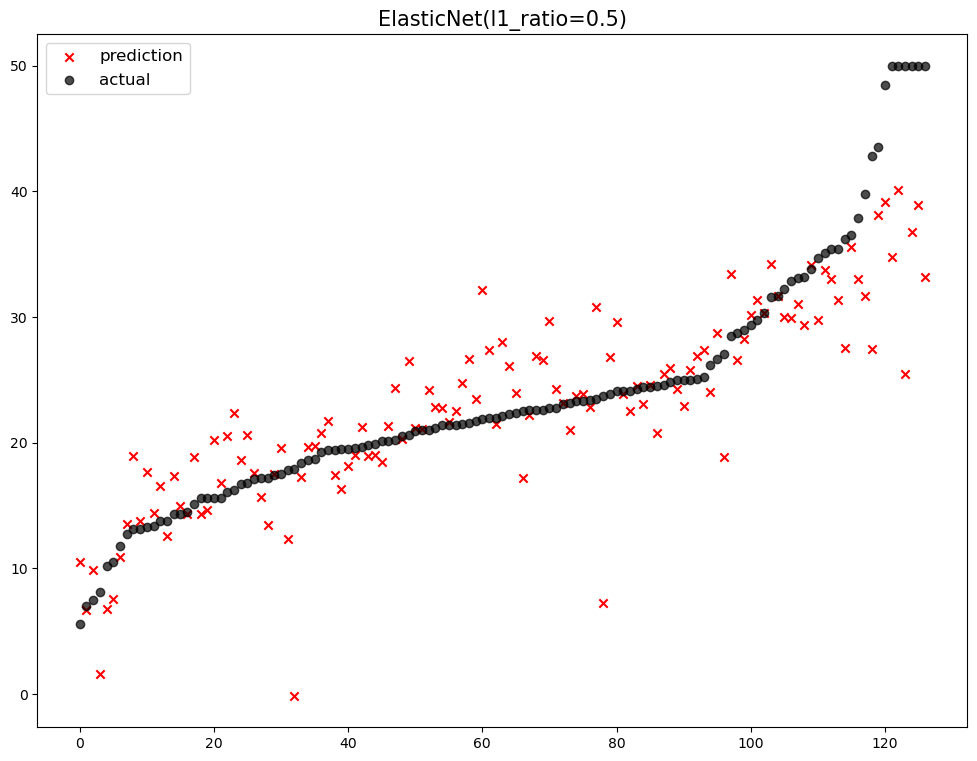

                      model        mse
0          Lasso(alpha=100)  69.319960
1           Lasso(alpha=10)  46.706710
2            Lasso(alpha=1)  33.038574
3  ElasticNet(l1_ratio=0.2)  29.538025
4  ElasticNet(l1_ratio=0.5)  29.358004
5          LinearRegression  26.884421
6       Lasso(alpha=0.0001)  26.879966
7        Lasso(alpha=0.001)  26.840394
8         Lasso(alpha=0.01)  26.495793
9          Lasso(alpha=0.1)  26.320899


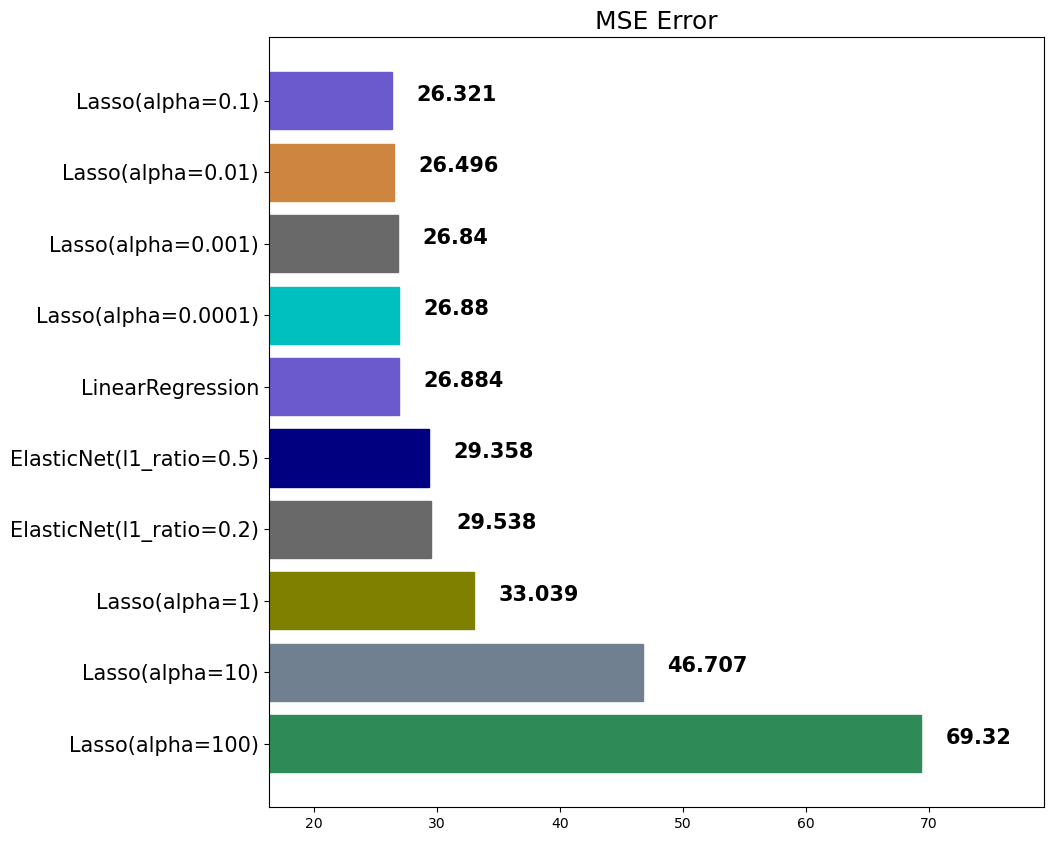

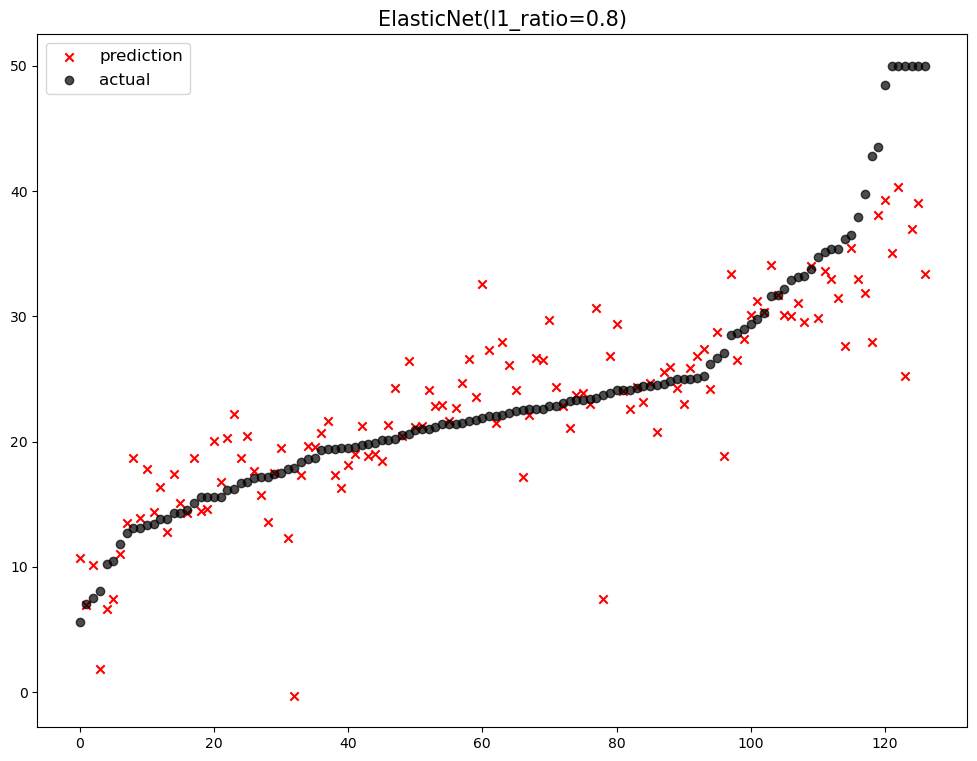

                       model        mse
0           Lasso(alpha=100)  69.319960
1            Lasso(alpha=10)  46.706710
2             Lasso(alpha=1)  33.038574
3   ElasticNet(l1_ratio=0.2)  29.538025
4   ElasticNet(l1_ratio=0.5)  29.358004
5   ElasticNet(l1_ratio=0.8)  28.958728
6           LinearRegression  26.884421
7        Lasso(alpha=0.0001)  26.879966
8         Lasso(alpha=0.001)  26.840394
9          Lasso(alpha=0.01)  26.495793
10          Lasso(alpha=0.1)  26.320899


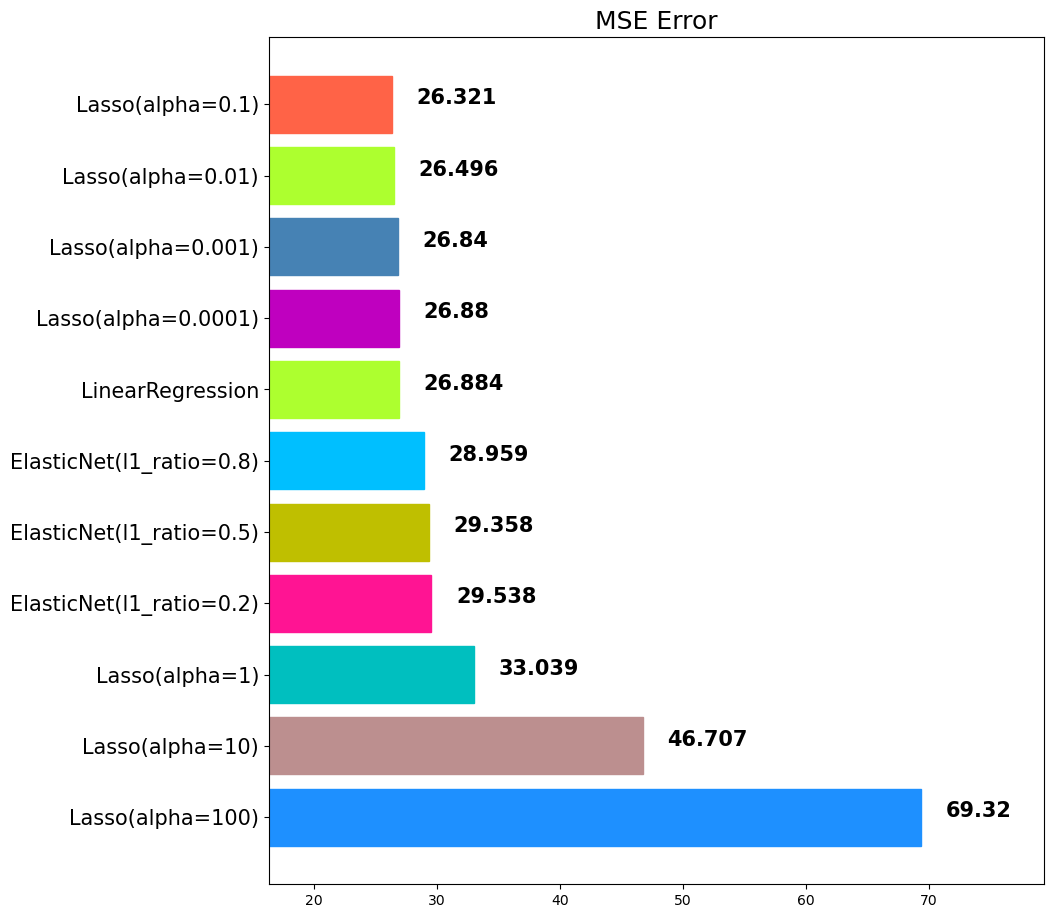

In [55]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

In [56]:
elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

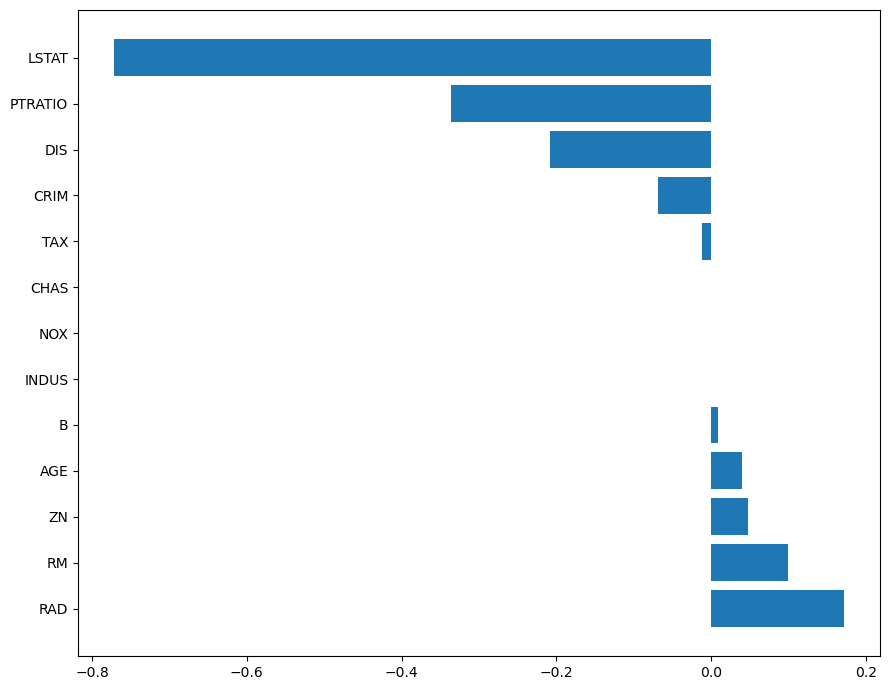

In [57]:
plot_coef(x_train.columns, elsticnet_20.coef_)

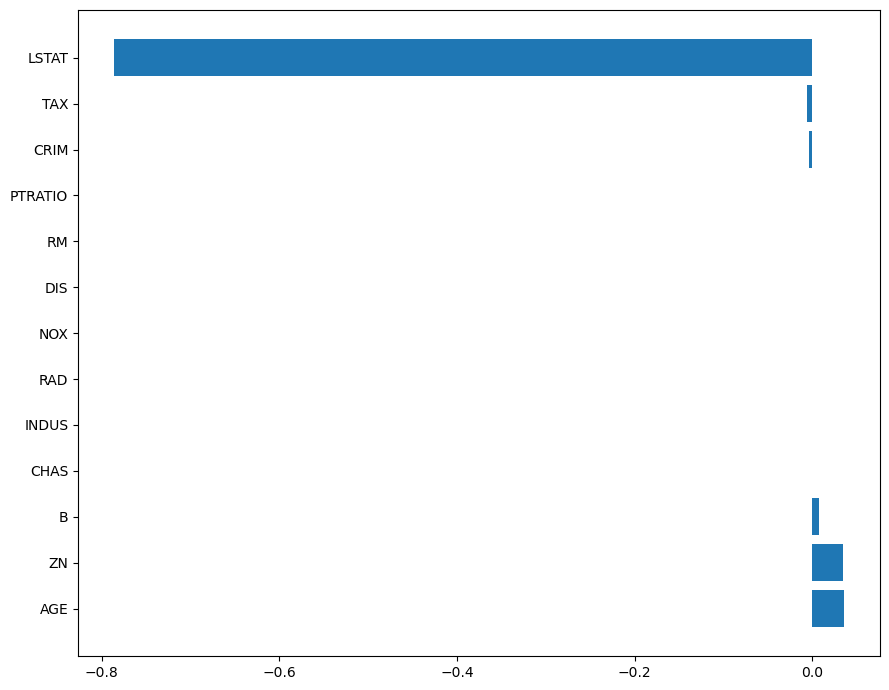

In [58]:
plot_coef(x_train.columns, elsticnet_80.coef_)

In [59]:
elsticnet_80.coef_

array([-0.00318175,  0.03506269, -0.        ,  0.        , -0.        ,
        0.        ,  0.03537263, -0.        ,  0.        , -0.00548048,
       -0.        ,  0.00815939, -0.78567535])

## Scaler

In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [61]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.00000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,4.032355,10.968338,11.312691,0.068602,0.555976,6.26828,69.829815,3.759965,9.994723,415.817942,18.580739,354.764617,12.765884
std,9.487333,22.583304,6.823637,0.253110,0.111955,0.68075,27.503520,2.082400,8.962590,171.940669,2.117544,93.560065,7.134090
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.56100,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082325,0.000000,5.190000,0.000000,0.451000,5.90900,47.300000,2.094100,4.000000,279.500000,17.400000,374.960000,7.160000
50%,0.283920,0.000000,9.690000,0.000000,0.538000,6.20200,79.200000,3.215700,5.000000,335.000000,19.100000,390.940000,11.480000
75%,4.548895,12.500000,18.100000,0.000000,0.631000,6.59950,94.350000,5.108550,24.000000,666.000000,20.200000,396.270000,17.135000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.72500,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### StandardScaler

평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 스케일러

In [62]:
std_scaler = StandardScaler()

In [63]:
std_scaled = std_scaler.fit_transform(x_train)

In [64]:
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.42,-0.49,-1.59,-0.27,-1.53,-3.98,-2.44,-1.26,-1.00,-1.33,-2.83,-3.79,-1.55
25%,-0.42,-0.49,-0.90,-0.27,-0.94,-0.53,-0.82,-0.80,-0.67,-0.79,-0.56,0.22,-0.79
50%,-0.40,-0.49,-0.24,-0.27,-0.16,-0.10,0.34,-0.26,-0.56,-0.47,0.25,0.39,-0.18
75%,0.05,0.07,1.00,-0.27,0.67,0.49,0.89,0.65,1.56,1.46,0.77,0.44,0.61
max,8.97,3.73,2.41,3.68,2.82,3.61,1.10,4.02,1.56,1.72,1.62,0.45,3.54


### MinMaxScaler

min값과 max값을 0~1사이로 정규화

In [65]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [66]:
round(pd.DataFrame(minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.05,0.12,0.40,0.07,0.35,0.52,0.69,0.24,0.39,0.44,0.64,0.89,0.30
std,0.11,0.24,0.25,0.25,0.23,0.13,0.28,0.19,0.39,0.33,0.23,0.24,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.14,0.45,0.46,0.09,0.13,0.18,0.51,0.94,0.15
50%,0.00,0.00,0.34,0.00,0.31,0.51,0.79,0.19,0.17,0.28,0.69,0.98,0.27
75%,0.05,0.13,0.65,0.00,0.51,0.59,0.94,0.36,1.00,0.91,0.81,1.00,0.43
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### RobustScaler

중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.

**outlier 값 처리에 유용**

In [67]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [68]:
round(pd.DataFrame(robust_scaled).median(), 2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

### 파이프라인

In [69]:
from sklearn.pipeline import make_pipeline

In [70]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [71]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

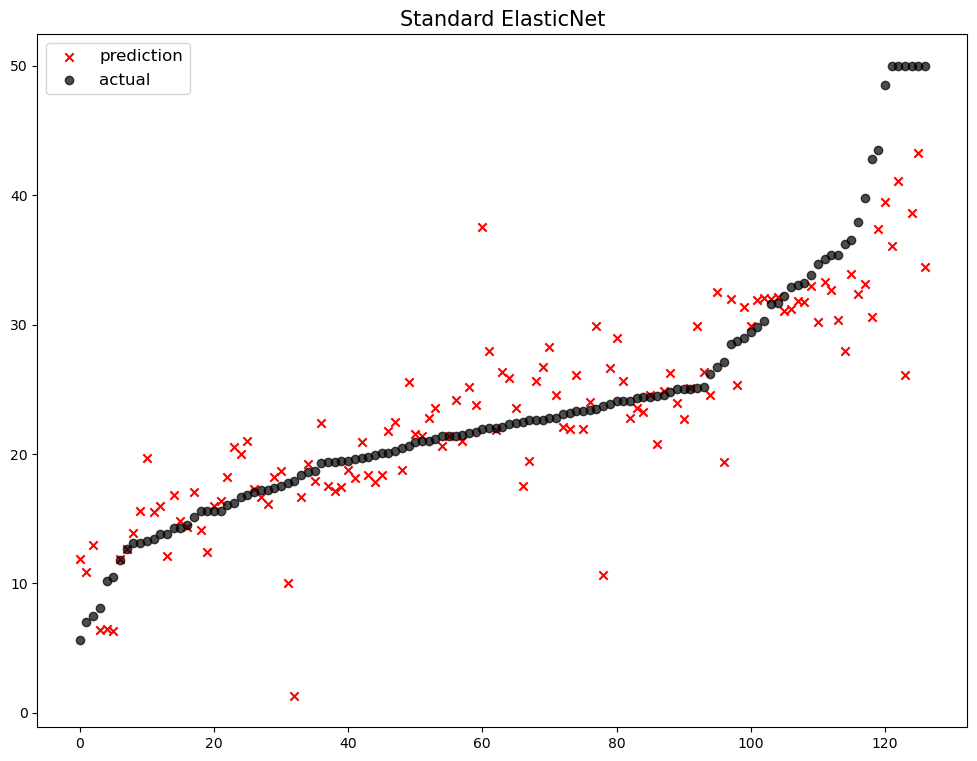

                       model        mse
0           Lasso(alpha=100)  69.319960
1            Lasso(alpha=10)  46.706710
2             Lasso(alpha=1)  33.038574
3   ElasticNet(l1_ratio=0.2)  29.538025
4   ElasticNet(l1_ratio=0.5)  29.358004
5   ElasticNet(l1_ratio=0.8)  28.958728
6           LinearRegression  26.884421
7        Lasso(alpha=0.0001)  26.879966
8         Lasso(alpha=0.001)  26.840394
9          Lasso(alpha=0.01)  26.495793
10          Lasso(alpha=0.1)  26.320899
11       Standard ElasticNet  25.908433


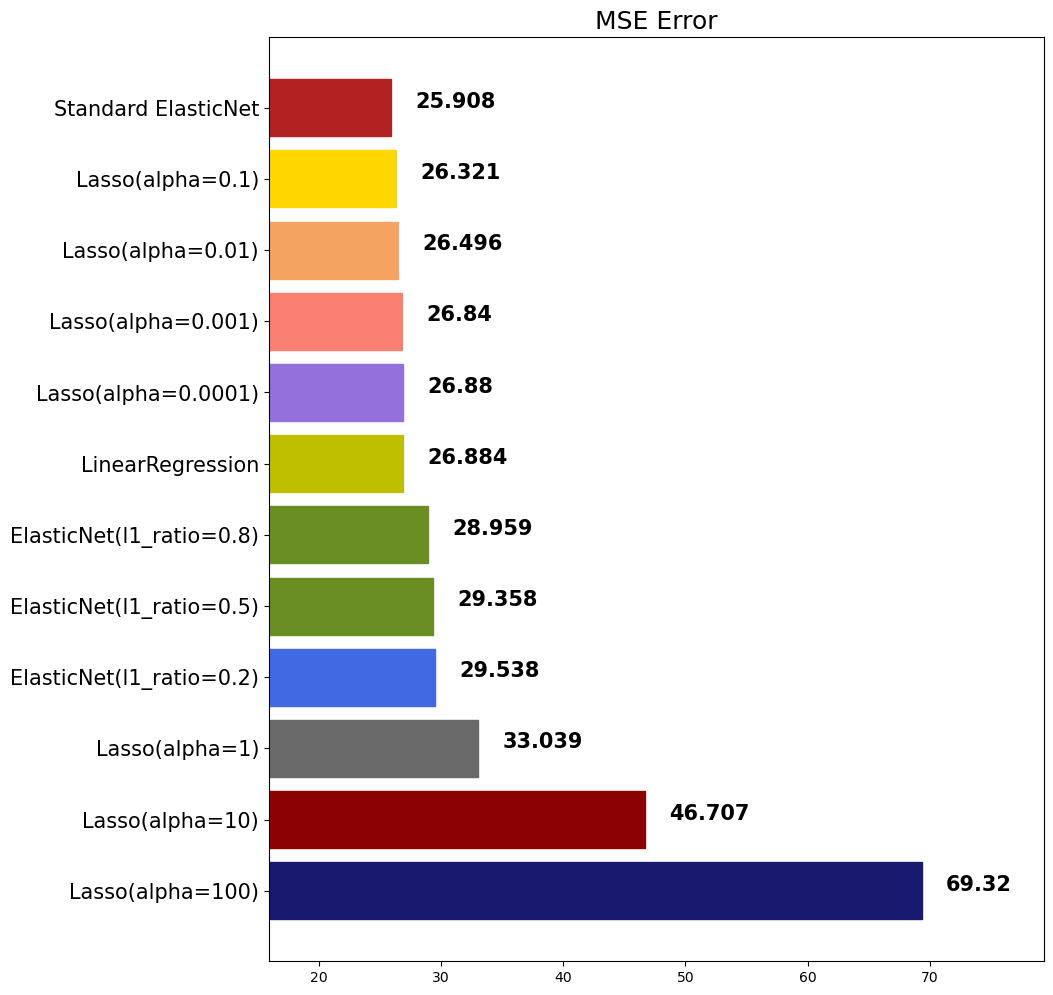

In [72]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

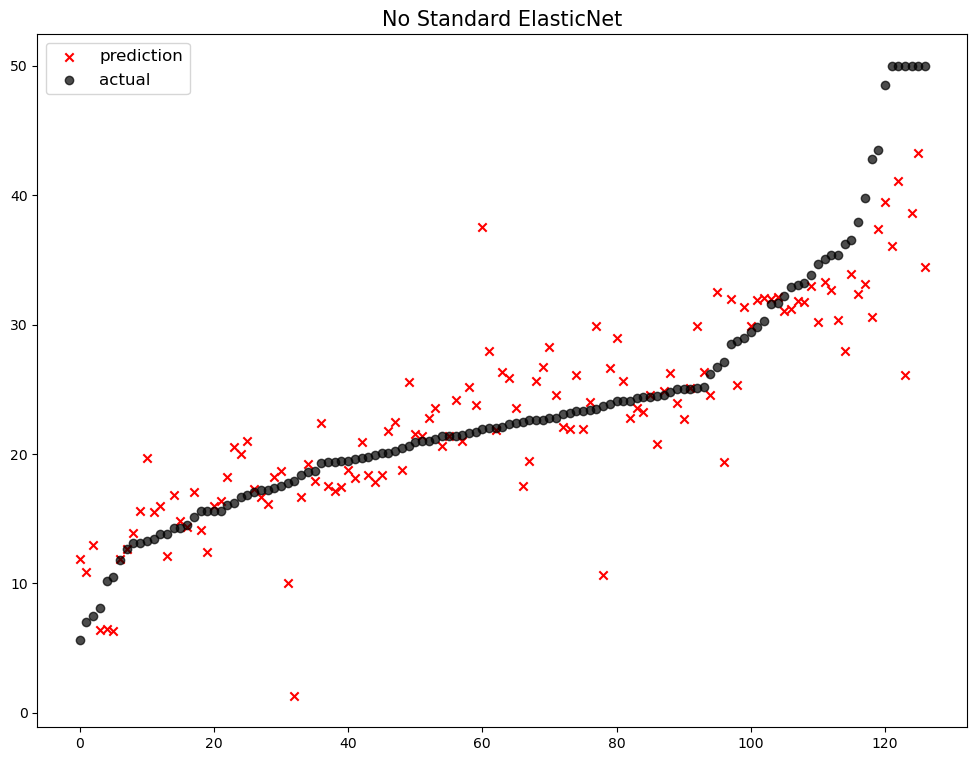

                       model        mse
0           Lasso(alpha=100)  69.319960
1            Lasso(alpha=10)  46.706710
2             Lasso(alpha=1)  33.038574
3   ElasticNet(l1_ratio=0.2)  29.538025
4   ElasticNet(l1_ratio=0.5)  29.358004
5   ElasticNet(l1_ratio=0.8)  28.958728
6           LinearRegression  26.884421
7        Lasso(alpha=0.0001)  26.879966
8         Lasso(alpha=0.001)  26.840394
9          Lasso(alpha=0.01)  26.495793
10          Lasso(alpha=0.1)  26.320899
11       Standard ElasticNet  25.908433
12    No Standard ElasticNet  25.908433


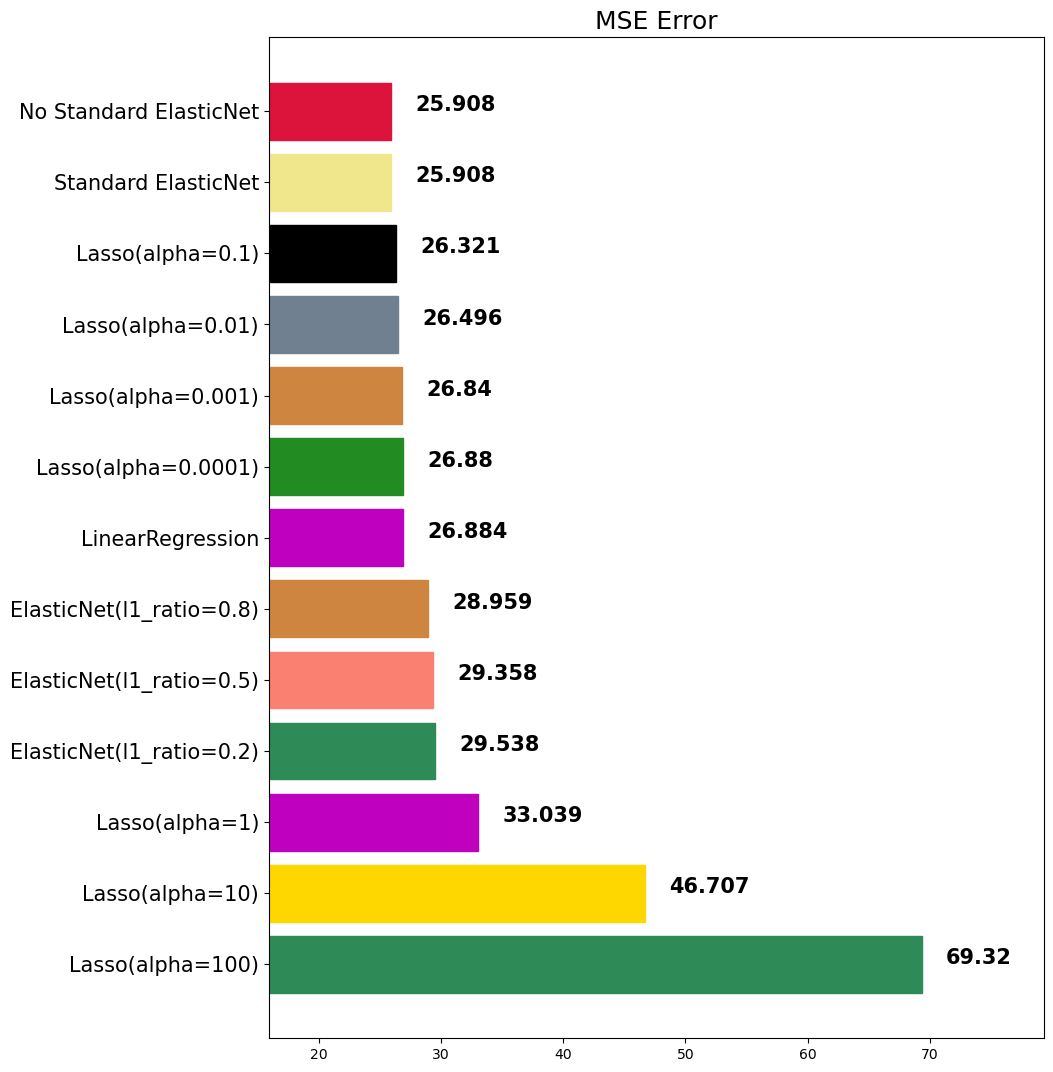

In [73]:
elasticnet_no_pipeline = ElasticNet(alpha=0.1, l1_ratio=0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('No Standard ElasticNet', elasticnet_pred, y_test)

### Polynomial Features

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)

다항식의 계수간 상호작용을 통해 **새로운 feature를 생성**합니다.

예를들면, [a, b] 2개의 feature가 존재한다고 가정하고,

degree=2로 설정한다면, polynomial features 는 [1, a, b, a^2, ab, b^2] 가 됩니다.

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [76]:
poly_features = poly.fit_transform(x_train)[0]

In [77]:
poly_features

array([    15.8603    ,      0.        ,     18.1       ,      0.        ,
            0.679     ,      5.896     ,     95.4       ,      1.9096    ,
           24.        ,    666.        ,     20.2       ,      7.68      ,
           24.39      ,    251.54911609,      0.        ,    287.07143   ,
            0.        ,     10.7691437 ,     93.5123288 ,   1513.07262   ,
           30.28682888,    380.6472    ,  10562.9598    ,    320.37806   ,
          121.807104  ,    386.832717  ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,    327.61      ,      0.        ,
           12.2899    ,    106.7176    ,   1726.74      ,     34.56376   ,
          434.4       ,  12054.6       ,    365.62      ,    139.008     ,
          441.459     ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [78]:
x_train.iloc[0]

CRIM        15.8603
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.6790
RM           5.8960
AGE         95.4000
DIS          1.9096
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B            7.6800
LSTAT       24.3900
Name: 425, dtype: float64

In [79]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [80]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.007e+01, tolerance: 3.101e+00
  model = cd_fast.enet_coordinate_descent(


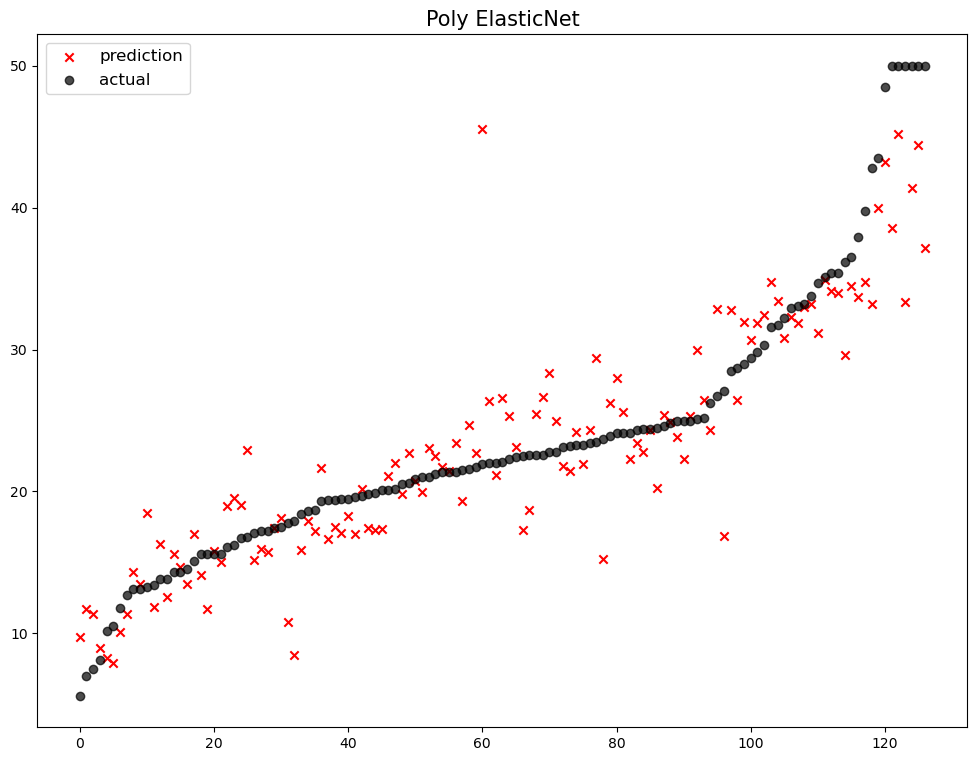

                       model        mse
0           Lasso(alpha=100)  69.319960
1            Lasso(alpha=10)  46.706710
2             Lasso(alpha=1)  33.038574
3   ElasticNet(l1_ratio=0.2)  29.538025
4   ElasticNet(l1_ratio=0.5)  29.358004
5   ElasticNet(l1_ratio=0.8)  28.958728
6           LinearRegression  26.884421
7        Lasso(alpha=0.0001)  26.879966
8         Lasso(alpha=0.001)  26.840394
9          Lasso(alpha=0.01)  26.495793
10          Lasso(alpha=0.1)  26.320899
11       Standard ElasticNet  25.908433
12    No Standard ElasticNet  25.908433
13           Poly ElasticNet  19.611218


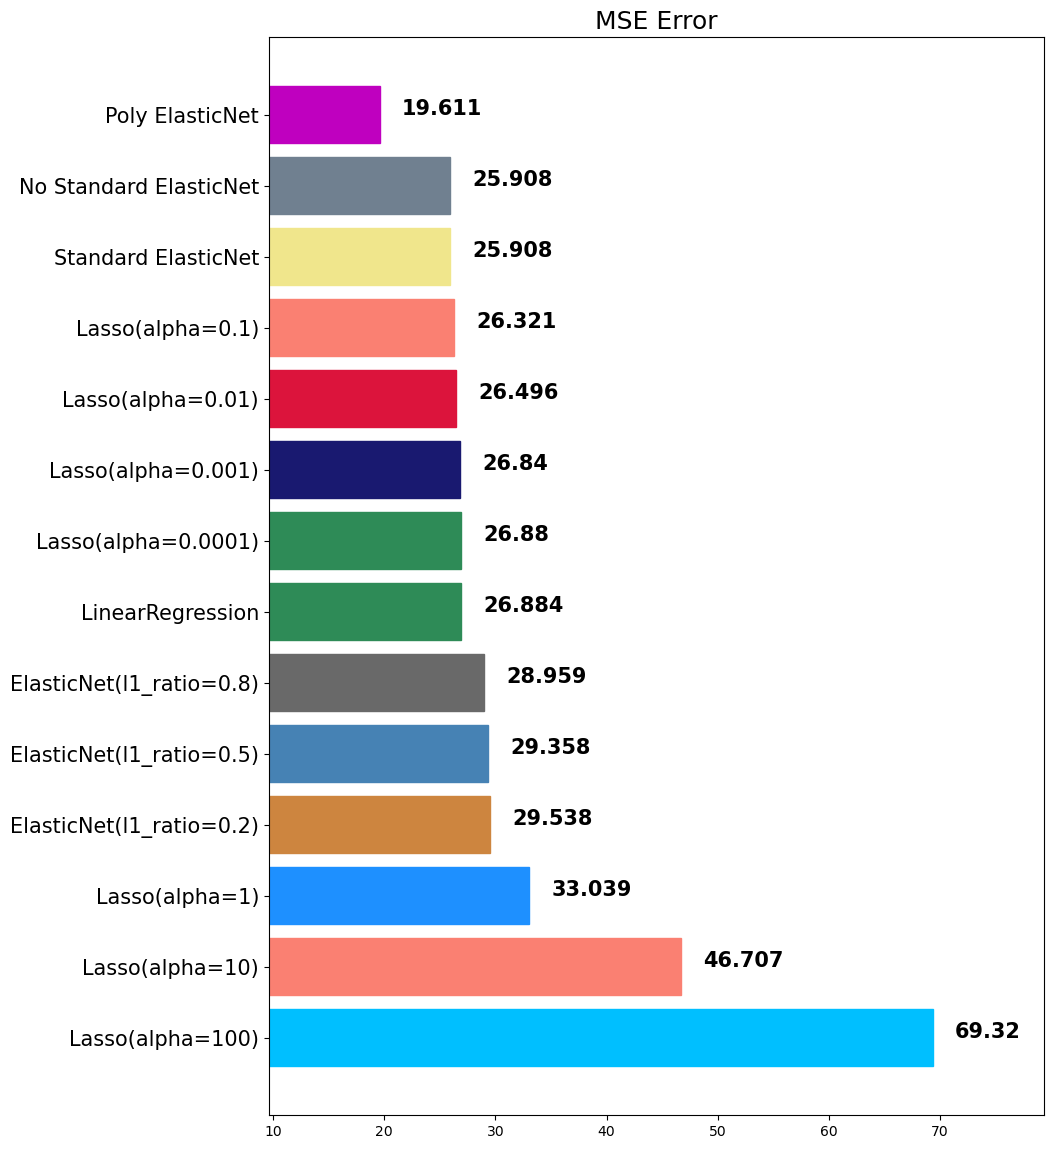

In [81]:
mse_eval('Poly ElasticNet', poly_pred, y_test)